# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [262]:
# Dependencies and Setup
import os
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn import datasets
from scipy.stats import linregress
import matplotlib.pyplot as plt
import requests
import time
from datetime import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy library to determine the cities based on latitude and longitude
#https://datatofish.com/how-to-install-python-package-in-anaconda/
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [212]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [213]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # used activity 6.2.4 04-Stu_BurundiWeatherApp
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # used activity 6.2.4 04-Stu_BurundiWeatherApp
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | farafangana
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | peterhead
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | kolonia
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | alamos
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | naifaru
Processing Record 17 of Set 1 | bunyan
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | nan
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | yumaguzino
Processing Record 22 of Set 1 | waddan
Processing Record 23 of Set 1 | ha

In [214]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [215]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,11.60,61,15,10.63,ZA,1685925027
1,farafangana,-22.8167,47.8333,19.78,90,97,1.96,MG,1685925028
2,yellowknife,62.4560,-114.3525,25.29,50,75,2.57,CA,1685925028
3,ribeira grande,38.5167,-28.7000,18.21,87,95,3.58,PT,1685925028
4,lompoc,34.6391,-120.4579,20.34,76,13,2.68,US,1685924735


In [216]:
#verify data types for all columns
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [217]:
#Display Date in readable format - separate columns to Date and Time so it can later be used in the scatterplot title
#source ChatGPT
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'])
#Extract Date & Time from the datetime and create two separate columns
city_data_df['Time'] = pd.to_datetime(city_data_df['Date']).dt.time
city_data_df['Date'] = pd.to_datetime(city_data_df['Date']).dt.date


In [218]:
# Export the City_Data into a csv
output_path = os.path.join("..", "output_data", "cities.csv")
city_data_df.to_csv(output_path, index_label="City_ID")

In [219]:
# Read saved data
city_data_df = pd.read_csv(output_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
City_ID,,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,11.60,61,15,10.63,ZA,1970-01-01,00:00:01.685925
1,farafangana,-22.8167,47.8333,19.78,90,97,1.96,MG,1970-01-01,00:00:01.685925
2,yellowknife,62.4560,-114.3525,25.29,50,75,2.57,CA,1970-01-01,00:00:01.685925
3,ribeira grande,38.5167,-28.7000,18.21,87,95,3.58,PT,1970-01-01,00:00:01.685925
4,lompoc,34.6391,-120.4579,20.34,76,13,2.68,US,1970-01-01,00:00:01.685924


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

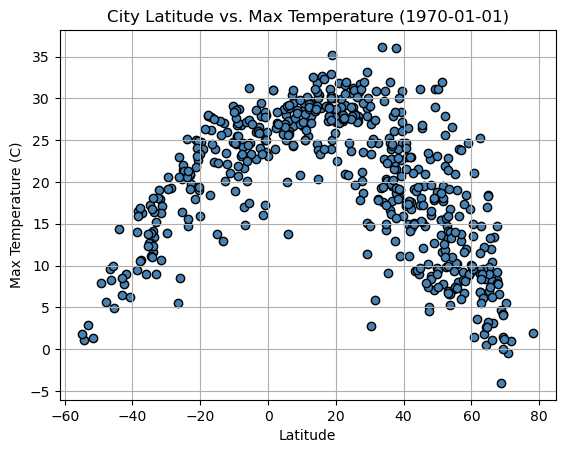

In [252]:
# Build scatter plot for latitude vs. temperature
#source: 6-2-5 Ins_OpenWeatherDataFrame
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
#define plt title with the average date of the date column in the dataframe
plt.title(f"City Latitude vs. Max Temperature ({city_data_df['Date'].min()})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig = os.path.join("..", "output_data","Fig1.png")
plt.savefig(output_fig)

# Show plot
plt.show()

#### Latitude Vs. Humidity

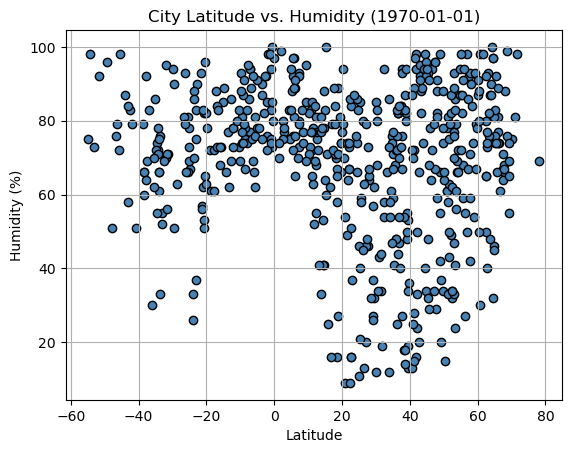

In [253]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_data_df['Date'].min()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig2 = os.path.join("..", "output_data","Fig2.png")
plt.savefig(output_fig2)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

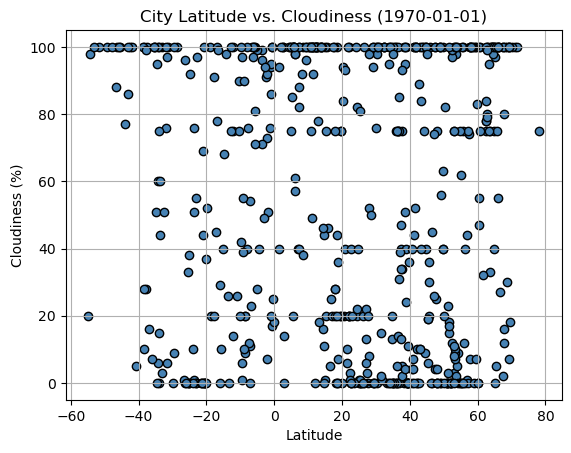

In [254]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_data_df['Date'].min()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig3 = os.path.join("..", "output_data","Fig3.png")
plt.savefig(output_fig3)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

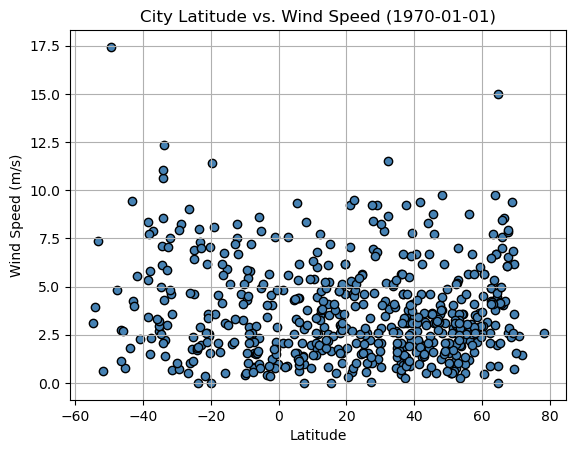

In [255]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_data_df['Date'].min()})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig4 = os.path.join("..", "output_data","Fig4.png")
plt.savefig(output_fig4)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [249]:
# Define a function to create Linear Regression plots:
#Source asked ChatGPT on how to define the function for linear regaression 
#that could be used for multiple plots 
#Tutorial on "def": https://www.programiz.com/python-programming/function#:~:text=The%20syntax%20to%20declare%20a%20function%20is%3A%20def,return%20%28optional%29%20-%20returns%20value%20from%20a%20function
#tested without parameters and it worked, but x_values & v-laues were not defined
#Couldn't figure out which arguments to define - started from x_values and y_values and added 
#additional ones from the lingress until it worked --> might've been a miracle...
def lregression(x_value, y_value, slope, intercept):
        
        
        # Run regression on hemisphere weather data
        # source: Class actity 6.2.7 Stu_Weather_Stats 
        (slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_value * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_value,y_value)
        plt.plot(x_value,regress_values,"r-")
        
        # Set y axis
        # based on the initail error after plugging in y_value in the function
        #ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
        #couldn't figure out how to pull the changing header so I opted to pull that setting 
        #from this definition

        # Label x axis
        plt.xlabel('Latitude')
        
        # Print r square value
        print(f"The r-value is: {rvalue**2}")
        

        #Annotate the text for the line equation with the coordinates of the point chnaning the values in the tuple
        #sources: plt.annotate function explanation: 
        #https://www.binarystudy.com/2023/05/how-to-show-point-coordinates-in-plot.html#:~:text=You%20can%20call%20the%20annotate%20%28%29%20function%20on,%281%2C%204%29%2C%20xytext%3D%20%281.5%2C%204.5%29%2C%20arrowprops%3Ddict%20%28facecolor%3D%27black%27%2C%20shrink%3D0.05%29%2C
        #https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
        #Chat GPT search on Annotate the text for the line equation with the coordinates of the point changing the values in the tuple
        #to get the location of the annotation stay constant across the regression graphs picked the min values for x and y to keep them in the bottm left corner 
        plt.annotate(line_eq, (x_value.min(), y_value.min()), fontsize=15, color="red")

        #Show plot
        plt.show()

In [225]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
City_ID,,,,,,,,,,
2,yellowknife,62.4560,-114.3525,25.29,50,75,2.57,CA,1970-01-01,00:00:01.685925
3,ribeira grande,38.5167,-28.7000,18.21,87,95,3.58,PT,1970-01-01,00:00:01.685925
4,lompoc,34.6391,-120.4579,20.34,76,13,2.68,US,1970-01-01,00:00:01.685924
5,peterhead,57.5058,-1.7981,9.22,92,74,1.62,GB,1970-01-01,00:00:01.685925
6,bethel,41.3712,-73.4140,14.93,72,100,2.06,US,1970-01-01,00:00:01.685925


In [226]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
City_ID,,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,11.60,61,15,10.63,ZA,1970-01-01,00:00:01.685925
1,farafangana,-22.8167,47.8333,19.78,90,97,1.96,MG,1970-01-01,00:00:01.685925
9,broken hill,-31.9500,141.4333,17.93,70,76,7.52,AU,1970-01-01,00:00:01.685925
14,port elizabeth,-33.9180,25.5701,14.16,66,0,12.35,ZA,1970-01-01,00:00:01.685925
17,port alfred,-33.5906,26.8910,13.43,76,44,2.24,ZA,1970-01-01,00:00:01.685925


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5943873641513445


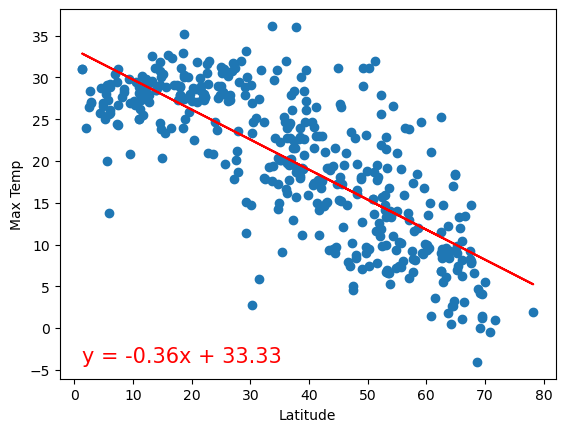

In [250]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
lregression(x_values, y_values, '', 0)

The r-value is: 0.6756735708331536


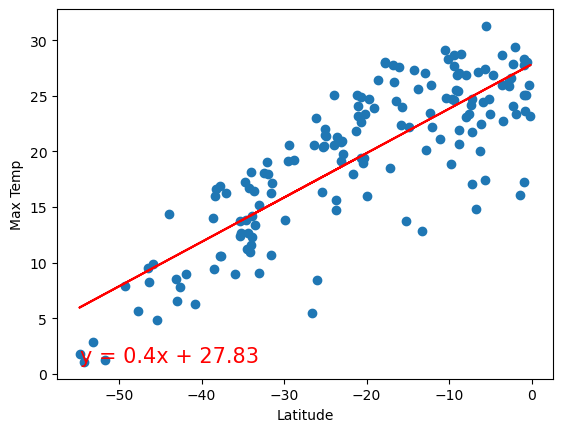

In [251]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
lregression(x_values, y_values, '', 0)


**Discussion about the linear relationship:** For the northern hemospehere there is a negative relationship bewteen the temp and latitue, while for the 
southern hemisphere the relationship is positive. For both hemispeheres the latitude accounts for about 60-67% variation in max temperatures. The graphs show that as you approach the equator the max temperatures are higher independently of the hemisphere. I expected the relationship to be stronger, so the spread was suprising.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0006389216454096334


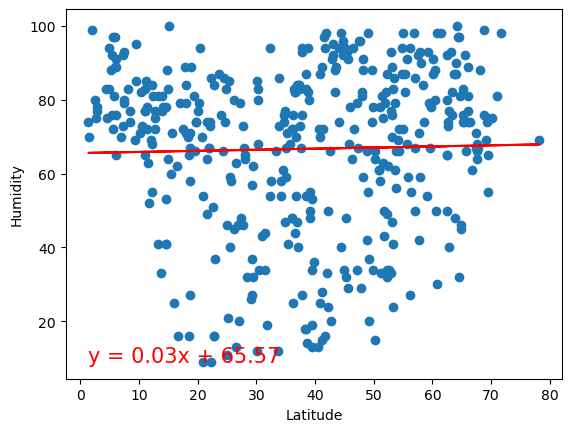

In [256]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel('Humidity')
lregression(x_values, y_values, '', 0)


The r-value is: 0.06534808327458268


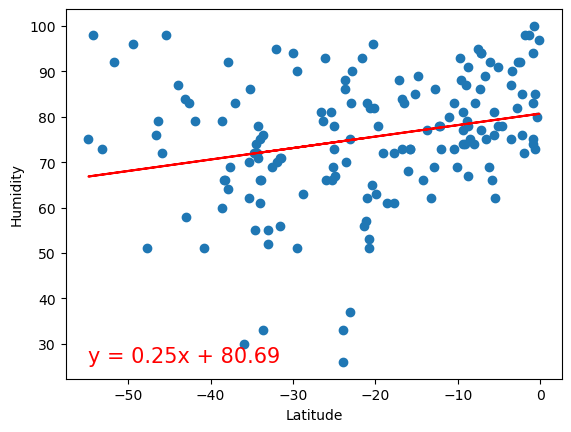

In [257]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plt.ylabel('Humidity')
lregression(x_value, y_value, '', 0)


**Discussion about the linear relationship:** The relationship between humidity and latitude is almost nonexistent for the northern hemisphere with only .06% of the varition humidity level could be explained by the latitude. The relationship for the sauthern hemisphere is a bit stronger, but still weak with latitude accounting for 6% of the variation in humidity. Even though the data fits the liner model better for the south, it looks like the set might have a few outliers that might be affecting the outcome. Further outlier impact analysis and/or normalizing the data could result in a stronger positive relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0009999545685169114


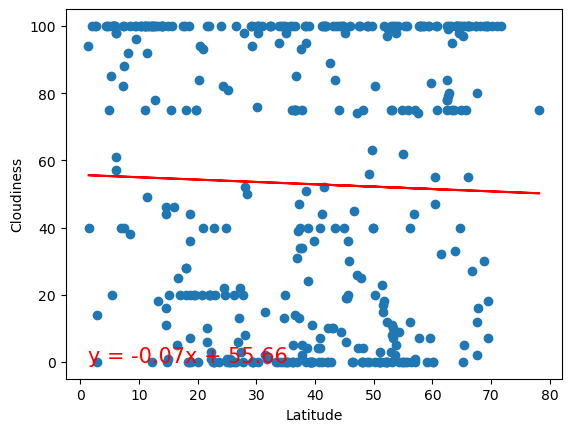

In [258]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel('Cloudiness')
lregression(x_values, y_values, '', 0)


The r-value is: 0.00824114038154925


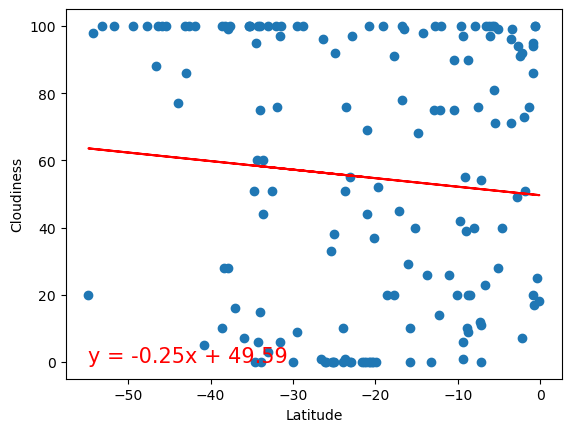

In [259]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel('Cloudiness')
lregression(x_values, y_values, '', 0)


**Discussion about the linear relationship:** Both southern and northern hemispeheres show a very weak relationship between the latitutde and Cloudiness. The relationship appears to be stronger for the southern hemisphere. A linear model might not be the most appropriate to outline the relationship since cloudiness is related to humidity and temperature. From additional research it seems that cloudiness is directly proportional to humidity while it is inversly proportional to temperature. Using a multiple regression might be more appopriate for this comparison (page 3 = https://www.globe.gov/documents/10157/5c1db298-1dd3-4fb1-8e40-daa3464dbcaa).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0050914277997541925


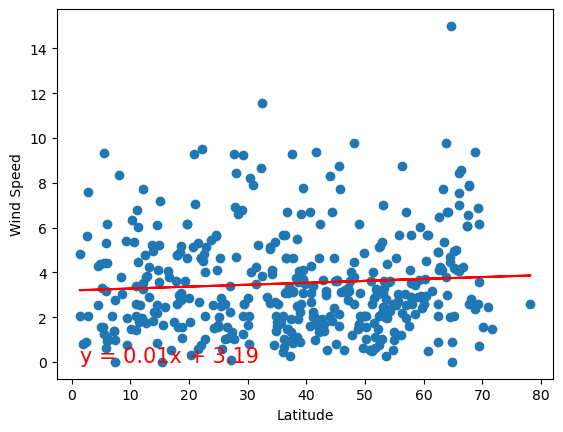

In [260]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed')
lregression(x_values, y_values, '', 0)

The r-value is: 0.05735252814659963


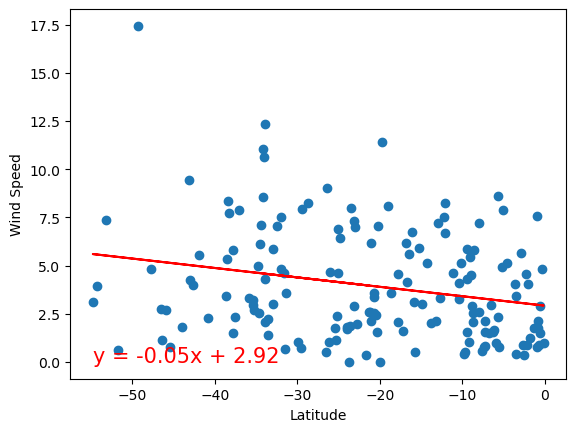

In [261]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed')
lregression(x_values, y_values, '', 0)

**Discussion about the linear relationship:** The relationship bewteen the windspeed and latitude is weak for both southern and northern hemispheres. The relationship is slightly stronger for the southern hemisphere with latitude accounting for 5.7% of the windspeed variability - it appears to be a slighly negative relatioship with windspeeds closer to equator being lower. Overall, it is surprising that the relationship is not stronger.  